In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/covid_data_train.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop_duplicates()

,lat,lng,name,population,district,subject,density,ivl_per_100k,ivl_number,ekmo_per_100k,...,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural,has_metro
0,52.651055,90.101159,Абаза,17111.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,NaN,2.278095e-11,NaN,NaN,0.0,NaN,64241.0,44921.0,19320.0,0.0
1,53.720902,91.442435,Абакан,165183.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,0.000903,8.343086e-10,0.001383,0.0,1.0,0.0,64241.0,44921.0,19320.0,0.0
2,53.682800,53.655701,Абдулино,20663.0,Приволжский,Оренбургская область,15.95,27.7,542.0,0.05,...,NaN,5.164813e-14,0.000376,NaN,0.0,0.0,270081.0,156761.0,113320.0,0.0
3,44.864953,38.157819,Абинск,34926.0,Южный,Краснодарский край,73.73,17.6,1000.0,0.07,...,NaN,1.187676e-14,0.000186,NaN,0.0,0.0,847286.0,452437.0,394849.0,0.0
4,56.525460,52.997251,Агрыз,19299.0,Приволжский,Татарстан,57.27,28.2,1100.0,0.00,...,NaN,4.750316e-13,0.001003,NaN,0.0,0.0,527462.0,371965.0,155497.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,57.880402,43.807240,Макарьев,7114.0,Центральный,Костромская область,10.70,19.1,121.0,0.00,...,NaN,1.276106e-13,NaN,NaN,0.0,NaN,99956.0,68367.0,31589.0,0.0
447,55.208321,67.252739,Макушино,8337.0,Уральский,Курганская область,11.91,NaN,NaN,NaN,...,NaN,NaN,0.000050,NaN,NaN,0.0,138138.0,81631.0,56507.0,0.0
448,58.844215,32.218636,Малая Вишера,12461.0,Северо-Западный,Новгородская область,10.97,NaN,NaN,NaN,...,NaN,NaN,0.000679,NaN,NaN,0.0,103185.0,66160.0,37025.0,0.0
449,52.399578,36.504021,Малоархангельск,3872.0,Центральный,Орловская область,30.25,21.8,160.0,0.00,...,NaN,3.079256e-14,0.000019,NaN,0.0,0.0,124919.0,80657.0,44262.0,0.0


### Exploring data

In [233]:
df

,lat,lng,name,population,district,subject,density,ivl_per_100k,ivl_number,ekmo_per_100k,...,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural,has_metro
0,52.651055,90.101159,Абаза,17111.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,NaN,2.278095e-11,NaN,NaN,0.0,NaN,64241.0,44921.0,19320.0,0.0
1,53.720902,91.442435,Абакан,165183.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,0.000903,8.343086e-10,0.001383,0.0,1.0,0.0,64241.0,44921.0,19320.0,0.0
2,53.682800,53.655701,Абдулино,20663.0,Приволжский,Оренбургская область,15.95,27.7,542.0,0.05,...,NaN,5.164813e-14,0.000376,NaN,0.0,0.0,270081.0,156761.0,113320.0,0.0
3,44.864953,38.157819,Абинск,34926.0,Южный,Краснодарский край,73.73,17.6,1000.0,0.07,...,NaN,1.187676e-14,0.000186,NaN,0.0,0.0,847286.0,452437.0,394849.0,0.0
4,56.525460,52.997251,Агрыз,19299.0,Приволжский,Татарстан,57.27,28.2,1100.0,0.00,...,NaN,4.750316e-13,0.001003,NaN,0.0,0.0,527462.0,371965.0,155497.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,57.880402,43.807240,Макарьев,7114.0,Центральный,Костромская область,10.70,19.1,121.0,0.00,...,NaN,1.276106e-13,NaN,NaN,0.0,NaN,99956.0,68367.0,31589.0,0.0
447,55.208321,67.252739,Макушино,8337.0,Уральский,Курганская область,11.91,NaN,NaN,NaN,...,NaN,NaN,0.000050,NaN,NaN,0.0,138138.0,81631.0,56507.0,0.0
448,58.844215,32.218636,Малая Вишера,12461.0,Северо-Западный,Новгородская область,10.97,NaN,NaN,NaN,...,NaN,NaN,0.000679,NaN,NaN,0.0,103185.0,66160.0,37025.0,0.0
449,52.399578,36.504021,Малоархангельск,3872.0,Центральный,Орловская область,30.25,21.8,160.0,0.00,...,NaN,3.079256e-14,0.000019,NaN,0.0,0.0,124919.0,80657.0,44262.0,0.0


In [ ]:
for district in df.district.unique:)

In [155]:
df[[i for i in df.columns if i.startswith('rural')] + ['population']]

,rural_50-54_years,rural_55-59_years,rural_60-64_years,rural_65-69_years,rural_70-74_years,rural_75-79_years,rural_80-84_years,rural_85-89_years,rural_90-94_years,rural,population
0,9467.00,12105.00,11901.00,9621.00,4897.00,2448.00,2906.00,1219.00,434.00,19320.0,17111.0
1,9467.00,12105.00,11901.00,9621.00,4897.00,2448.00,2906.00,1219.00,434.00,19320.0,165183.0
2,54073.99,67288.00,61433.99,44975.00,27214.99,17180.99,21453.99,6733.00,3378.99,113320.0,20663.0
3,154571.00,186884.00,178566.99,154503.00,99462.00,65497.99,76176.99,21533.99,12139.99,394849.0,34926.0
4,68434.99,76880.99,67086.99,49885.99,31964.99,25153.00,31070.99,15329.99,6277.00,155497.0,19299.0
...,...,...,...,...,...,...,...,...,...,...,...
446,12678.00,16623.00,17478.99,13025.00,7488.99,4259.00,5175.00,2522.99,888.00,31589.0,7114.0
447,20799.99,27817.99,28985.00,23308.00,13398.99,7778.00,10236.00,3903.00,1878.00,56507.0,8337.0
448,10954.00,14623.00,15408.00,12659.99,8698.00,5282.00,7005.00,3538.00,1424.00,37025.0,12461.0
449,17514.00,21398.99,21080.99,15317.99,10093.99,6368.00,8276.00,3613.00,1430.00,44262.0,3872.0


In [175]:
df[["inf_rate"]].describe()

,inf_rate
count,426.000000
mean,2.039893
std,0.930176
min,0.693147
25%,1.386294
50%,1.945910
75%,2.708050
max,4.718499


In [174]:
df[df.rural > df.population][['inf_rate']].describe()

,inf_rate
count,348.000000
mean,2.103515
std,0.950387
min,0.693147
25%,1.386294
50%,2.079442
75%,2.708050
max,4.718499


In [179]:
df[df.has_metro == 1][['inf_rate']]

,inf_rate
219,3.218876


In [173]:
df[df.rural < df.population][['inf_rate']].describe()

,inf_rate
count,78.000000
mean,1.756044
std,0.777990
min,0.693147
25%,1.098612
50%,1.609438
75%,2.246799
max,4.718499


In [319]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False).head(60)

epirank_avia                   89.36
epirank_avia_cat               89.36
ecology                        75.17
life_costs                     75.17
security                       75.17
public_transport               75.17
shops_and_malls                75.17
sport_and_outdoor              75.17
children_places                75.17
neighbourhood                  75.17
public_services                75.17
cleanness                      75.17
life_quality_place_rating      75.17
ekmo_number                    56.76
epirank_train_cat              38.80
epirank_train                  38.80
epirank_bus_cat                26.39
epirank_bus                    26.39
ekmo_per_100k                  21.95
ivl_number                     21.95
ivl_per_100k                   21.95
num_patients_tubercul_1995     11.31
num_patients_tubercul_1992     11.31
num_patients_tubercul_2002     11.31
num_patients_tubercul_2001     11.31
num_patients_tubercul_1994     11.31
num_patients_tubercul_2000     11.31
n

In [304]:
def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

In [305]:
drop_constant_column(df[df.name == "Вельск"])

,life_quality_place_rating,ecology,cleanness,public_services,neighbourhood,children_places,sport_and_outdoor,shops_and_malls,public_transport,security,...,volume_serv_sport_2017,volume_serv_hotels_2017,volume_serv_tourism_2017,volume_serv_sanatorium_2017,num_phones_rural_2018,num_phones_urban_2019,bus_march_travel_18,bus_april_travel_18,epirank_avia,epirank_avia_cat
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,472206.8,1339836.8,1879836.3,1193270.59,178092.99,33344.99,66893.8,68055.6,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,472206.8,1339836.8,1879836.3,1193270.59,178092.99,33344.99,66387.7,67546.5,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,446716.3,1276317.8,1790150.1,1183219.50,170261.99,31320.00,66893.8,68055.6,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,446716.3,1276317.8,1790150.1,1183219.50,170261.99,31320.00,66387.7,67546.5,NaN,NaN


In [181]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
correlated_features = to_drop

C:\Users\adnvl\AppData\Local\Temp\ipykernel_20576\1692054671.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [182]:
df2 = df.drop(correlated_features, axis=1)

In [184]:
df = df2

In [17]:
for i in df.columns:
    print(i, end=" ")

lat lng name population district subject density ivl_per_100k ivl_number ekmo_per_100k ekmo_number life_quality_place_rating ecology cleanness public_services neighbourhood children_places sport_and_outdoor shops_and_malls public_transport security life_costs inf_rate avg_temp_min avg_temp_max avg_temp_std avg_temp_median humidity_min humidity_max humidity_std humidity_median pressure_min pressure_max pressure_std pressure_median wind_speed_ms_min wind_speed_ms_max wind_speed_ms_std wind_speed_ms_median region_x urban_50-54_years urban_55-59_years urban_60-64_years urban_65-69_years urban_70-74_years urban_75-79_years urban_80-84_years urban_85-89_years urban_90-94_years rural_50-54_years rural_55-59_years rural_60-64_years rural_65-69_years rural_70-74_years rural_75-79_years rural_80-84_years rural_85-89_years rural_90-94_years work_ratio_15-72_years work_ratio_55-64_years work_ratio_15-24_years work_ratio_15-64_years work_ratio_25-54_years num_patients_tubercul_1992 num_patients_tub

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 120 entries, lat to has_metro
dtypes: float64(116), object(4)
memory usage: 422.9+ KB


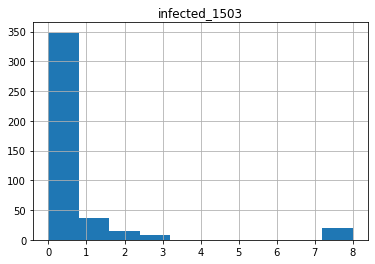

In [35]:
df.hist(column="infected_1503");

In [44]:
df.isna().any()[lambda x: x==False]


lat         False
lng         False
name        False
district    False
subject     False
dtype: bool

In [18]:
df.isnull().sum().sort_values(ascending = False)[lambda x: x!=0].head(30)

epirank_avia                  403
epirank_avia_cat              403
ecology                       339
life_costs                    339
security                      339
public_transport              339
shops_and_malls               339
sport_and_outdoor             339
children_places               339
neighbourhood                 339
public_services               339
cleanness                     339
life_quality_place_rating     339
ekmo_number                   256
epirank_train_cat             175
epirank_train                 175
epirank_bus_cat               119
epirank_bus                   119
ekmo_per_100k                  99
ivl_number                     99
ivl_per_100k                   99
num_patients_tubercul_1995     51
num_patients_tubercul_1992     51
num_patients_tubercul_2002     51
num_patients_tubercul_2001     51
num_patients_tubercul_1994     51
num_patients_tubercul_2000     51
num_patients_tubercul_1996     51
num_patients_tubercul_1997     51
num_patients_t

In [19]:
df.district.unique()

array(['Сибирский', 'Приволжский', 'Южный', 'Уральский',
       'Дальневосточный', 'Центральный', 'Северо-Западный',
       'Северо-Кавказский'], dtype=object)

In [299]:
df.name.value_counts()

451

In [21]:
df.subject.unique()

array(['Хакасия', 'Оренбургская область', 'Краснодарский край',
       'Татарстан', 'Ростовская область', 'Свердловская область',
       'Чувашия', 'Якутия', 'Алтайский край', 'Владимирская область',
       'Пермский край', 'Белгородская область', 'Тульская область',
       'Иркутская область', 'Крым', 'Чукотский АО', 'Тверская область',
       'Кемеровская область', 'Мурманская область', 'Чечня', 'Мордовия',
       'Нижегородская область', 'Саратовская область', 'Приморский край',
       'Красноярский край', 'Архангельская область', 'Томская область',
       'Астраханская область', 'Челябинская область',
       'Вологодская область', 'Бурятия', 'Кабардино-Балкария',
       'Калужская область', 'Московская область', 'Забайкальский край',
       'Новосибирская область', 'Ульяновская область',
       'Пензенская область', 'Амурская область', 'Карелия',
       'Башкортостан', 'Ханты-Мансийский АО — Югра',
       'Северная Осетия — Алания', 'Хабаровский край', 'Еврейская АО',
       'Ставр

In [22]:
df.region_x.unique()

array(['Республика Хакасия', 'Оренбургская область', 'Краснодарский край',
       'Республика Татарстан', 'Ростовская область',
       'Свердловская область', 'Республика Чувашия',
       'Республика Саха (Якутия)', 'Алтайский край',
       'Владимирская область', 'Пермский край', 'Белгородская область',
       'Тульская область', 'Иркутская область', 'Республика Крым', nan,
       'Тверская область', 'Кемеровская область', 'Мурманская область',
       'Чеченская Республика', 'Республика Мордовия',
       'Нижегородская область', 'Саратовская область', 'Приморский край',
       'Красноярский край', 'Архангельская область', 'Томская область',
       'Челябинская область', 'Вологодская область', 'Республика Бурятия',
       'Кабардино-Балкарская Республика', 'Калужская область',
       'Московская область', 'Забайкальский край',
       'Новосибирская область', 'Ульяновская область',
       'Пензенская область', 'Амурская область',
       'Республика Башкортостан',
       'Ханты-Мансийски

In [61]:
df.subject.corrwith("region_x")

AttributeError: 'Series' object has no attribute 'corrwith'

### Cleaning categorical data (filling Na)

In [234]:
missing_data_subject = set()
for i, elem in enumerate(df.region_x.isna()):
    if elem == True:
        print(i, elem, df['subject'].iloc[i])
        missing_data_subject.add(df['subject'].iloc[i])
        
print(missing_data_subject)

missing_regions = ['Республика Карелия', 'Республика Северная Осетия — Алания', 'Магаданская область', 'Республика Тыва', 'Еврейская автономная область', 'Ямало-Ненецкий автономный округ', 'Чукотский автономный округ', 'Астраханская область' ,'Республика Алтай', 'Курская область']

possibilities_dict = dict()
missing_data_subject = list(missing_data_subject)
for subject in missing_data_subject:
    for region in missing_regions:
        if subject.split()[0] in region:
            possibilities_dict[subject] = region 

categorical_df = df.select_dtypes(include=np.object)
for i, elem in enumerate(categorical_df['region_x']):
    if pd.isna(elem):
        subject_name = categorical_df['subject'].iloc[i]
        categorical_df['region_x'].iloc[i] = possibilities_dict[subject_name]
categorical_df = categorical_df.drop("subject", axis=1)
    

20 True Чукотский АО
43 True Астраханская область
45 True Астраханская область
72 True Карелия
79 True Северная Осетия — Алания
82 True Еврейская АО
134 True Северная Осетия — Алания
169 True Алтай
181 True Ямало-Ненецкий АО
231 True Курская область
232 True Курская область
261 True Астраханская область
320 True Карелия
355 True Карелия
365 True Карелия
404 True Курская область
406 True Курская область
409 True Тыва
412 True Ямало-Ненецкий АО
416 True Карелия
437 True Курская область
441 True Магаданская область
{'Курская область', 'Карелия', 'Еврейская АО', 'Ямало-Ненецкий АО', 'Магаданская область', 'Алтай', 'Северная Осетия — Алания', 'Астраханская область', 'Чукотский АО', 'Тыва'}


C:\Users\adnvl\AppData\Local\Temp\ipykernel_20576\4168461662.py:18: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = df.select_dtypes(include=np.object)


In [235]:
categorical_df.head(30)

,name,district,region_x
0,Абаза,Сибирский,Республика Хакасия
1,Абакан,Сибирский,Республика Хакасия
2,Абдулино,Приволжский,Оренбургская область
3,Абинск,Южный,Краснодарский край
4,Агрыз,Приволжский,Республика Татарстан
5,Азнакаево,Приволжский,Республика Татарстан
6,Азов,Южный,Ростовская область
7,Аксай,Южный,Ростовская область
8,Алапаевск,Уральский,Свердловская область
9,Алатырь,Приволжский,Республика Чувашия


In [236]:
categorical_df.isnull().values.any()

False

In [237]:
#test wihtout categorical
categorical_df.drop("name", axis=1, inplace=True)

### One hot encoding categorical data

In [238]:
#cities = pd.get_dummies(categorical_df.name, prefix='city_') test wihtout categorical
districts = pd.get_dummies(categorical_df.district, prefix='district_')
regions = pd.get_dummies(categorical_df.region_x, prefix='region_')
ohe_categorical_df = pd.concat([districts, regions], axis=1) # without cities

In [239]:
ohe_categorical_df.corr()

,district__Дальневосточный,district__Приволжский,district__Северо-Западный,district__Северо-Кавказский,district__Сибирский,district__Уральский,district__Центральный,district__Южный,region__Алтайский край,region__Амурская область,...,region__Тюменская область,region__Удмуртская Республика,region__Ульяновская область,region__Хабаровский край,region__Ханты-Мансийский автономный округ — Югра,region__Челябинская область,region__Чеченская Республика,region__Чукотский автономный округ,region__Ямало-Ненецкий автономный округ,region__Ярославская область
district__Дальневосточный,1.000000,-0.103399,-0.081504,-0.047605,-0.085735,-0.083209,-0.127778,-0.075376,-0.029697,0.370294,...,-0.029697,-0.020905,-0.018084,0.370294,-0.018084,-0.038072,-0.018084,0.213313,-0.014749,-0.018084
district__Приволжский,-0.103399,1.000000,-0.172561,-0.100790,-0.181520,-0.176172,-0.270534,-0.159588,-0.062876,-0.038288,...,-0.062876,0.202178,0.174896,-0.038288,-0.038288,-0.080608,-0.038288,-0.022056,-0.031227,-0.038288
district__Северо-Западный,-0.081504,-0.172561,1.000000,-0.079447,-0.143082,-0.138866,-0.213247,-0.125794,-0.049562,-0.030180,...,-0.049562,-0.034888,-0.030180,-0.030180,-0.030180,-0.063538,-0.030180,-0.017386,-0.024615,-0.030180
district__Северо-Кавказский,-0.047605,-0.100790,-0.079447,1.000000,-0.083572,-0.081110,-0.124554,-0.073474,-0.028948,-0.017628,...,-0.028948,-0.020378,-0.017628,-0.017628,-0.017628,-0.037112,0.379879,-0.010155,-0.014377,-0.017628
district__Сибирский,-0.085735,-0.181520,-0.143082,-0.083572,1.000000,-0.146076,-0.224318,-0.132325,0.346386,-0.031747,...,-0.052135,-0.036699,-0.031747,-0.031747,-0.031747,-0.066837,-0.031747,-0.018288,-0.025893,-0.031747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
region__Челябинская область,-0.038072,-0.080608,-0.063538,-0.037112,-0.066837,0.457551,-0.099613,-0.058761,-0.023151,-0.014098,...,-0.023151,-0.016297,-0.014098,-0.014098,-0.014098,1.000000,-0.014098,-0.008121,-0.011498,-0.014098
region__Чеченская Республика,-0.018084,-0.038288,-0.030180,0.379879,-0.031747,-0.030812,-0.047315,-0.027911,-0.010997,-0.006696,...,-0.010997,-0.007741,-0.006696,-0.006696,-0.006696,-0.014098,1.000000,-0.003858,-0.005462,-0.006696
region__Чукотский автономный округ,0.213313,-0.022056,-0.017386,-0.010155,-0.018288,-0.017750,-0.027257,-0.016079,-0.006335,-0.003858,...,-0.006335,-0.004459,-0.003858,-0.003858,-0.003858,-0.008121,-0.003858,1.000000,-0.003146,-0.003858
region__Ямало-Ненецкий автономный округ,-0.014749,-0.031227,-0.024615,-0.014377,-0.025893,0.177254,-0.038590,-0.022764,-0.008969,-0.005462,...,-0.008969,-0.006313,-0.005462,-0.005462,-0.005462,-0.011498,-0.005462,-0.003146,1.000000,-0.005462


In [240]:
# correlating regions
cor_matrix = ohe_categorical_df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)


[]


C:\Users\adnvl\AppData\Local\Temp\ipykernel_20576\3159577055.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [241]:
ohe_categorical_df.isnull().values.any()

False

### Binary data

In [242]:
for column in df.select_dtypes(include=np.number).columns:
    if len(df[column].unique()) <= 3:
        print(column, df[column].unique())

has_metro [ 0. nan  1.]


<AxesSubplot:>

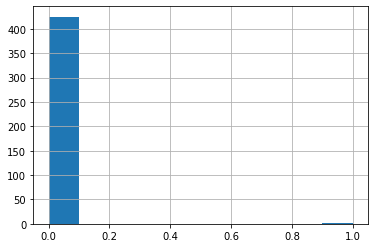

In [243]:
df['has_metro'].hist()

In [244]:
df.has_metro.isna().any()

True

In [245]:
# check manually if city has a metro

In [246]:
df[df['has_metro'].isna()].name

20           Анадырь
43         Астрахань
45         Ахтубинск
57             Балей
72         Беломорск
79            Беслан
82        Биробиджан
98             Борзя
134      Владикавказ
169    Горно-Алтайск
181       Губкинский
231     Железногорск
232     Железногорск
261         Знаменск
320             Кемь
355        Кондопога
365       Костомукша
378    Краснокаменск
404            Курск
406         Курчатов
409            Кызыл
412       Лабытнанги
416      Лахденпохья
437            Льгов
441          Магадан
Name: name, dtype: object

In [247]:
# none of them has a metro, so fill with 0

In [248]:
metro_column = df.has_metro

In [249]:
metro_column = metro_column.fillna(0)

In [250]:
metro_column.isna().any()

False

In [251]:
# binary is: has_metro and categorical
# numerical is: other data 

In [252]:
#merge all binary and numerical
binary_df = pd.concat([ohe_categorical_df, metro_column], axis=1)
numerical_df = df.select_dtypes(include=np.number).drop('has_metro', axis=1)

In [253]:
numerical_df

,lat,lng,population,density,ivl_per_100k,ivl_number,ekmo_per_100k,ekmo_number,life_quality_place_rating,ecology,...,bus_april_travel_18,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
0,52.651055,90.101159,17111.0,8.68,NaN,NaN,NaN,NaN,NaN,NaN,...,22186.0,NaN,2.278095e-11,NaN,NaN,0.0,NaN,64241.0,44921.0,19320.0
1,53.720902,91.442435,165183.0,8.68,NaN,NaN,NaN,NaN,26.0,93.0,...,22186.0,0.000903,8.343086e-10,0.001383,0.0,1.0,0.0,64241.0,44921.0,19320.0
2,53.682800,53.655701,20663.0,15.95,27.7,542.0,0.05,1.0,NaN,NaN,...,133554.9,NaN,5.164813e-14,0.000376,NaN,0.0,0.0,270081.0,156761.0,113320.0
3,44.864953,38.157819,34926.0,73.73,17.6,1000.0,0.07,4.0,NaN,NaN,...,328273.8,NaN,1.187676e-14,0.000186,NaN,0.0,0.0,847286.0,452437.0,394849.0
4,56.525460,52.997251,19299.0,57.27,28.2,1100.0,0.00,NaN,NaN,NaN,...,162064.9,NaN,4.750316e-13,0.001003,NaN,0.0,0.0,527462.0,371965.0,155497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,57.880402,43.807240,7114.0,10.70,19.1,121.0,0.00,NaN,NaN,NaN,...,47905.6,NaN,1.276106e-13,NaN,NaN,0.0,NaN,99956.0,68367.0,31589.0
447,55.208321,67.252739,8337.0,11.91,NaN,NaN,NaN,NaN,NaN,NaN,...,37999.8,NaN,NaN,0.000050,NaN,NaN,0.0,138138.0,81631.0,56507.0
448,58.844215,32.218636,12461.0,10.97,NaN,NaN,NaN,NaN,NaN,NaN,...,28061.6,NaN,NaN,0.000679,NaN,NaN,0.0,103185.0,66160.0,37025.0
449,52.399578,36.504021,3872.0,30.25,21.8,160.0,0.00,NaN,NaN,NaN,...,37310.6,NaN,3.079256e-14,0.000019,NaN,0.0,0.0,124919.0,80657.0,44262.0


### Cleaning numerical data (filling Na)

In [254]:
for i in numerical_df.columns[numerical_df.isnull().any(axis=0)]: 
    numerical_df[i].fillna(numerical_df[i].mean(),inplace=True)


In [255]:
numerical_df

,lat,lng,population,density,ivl_per_100k,ivl_number,ekmo_per_100k,ekmo_number,life_quality_place_rating,ecology,...,bus_april_travel_18,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
0,52.651055,90.101159,17111.0,8.68,21.882955,524.815426,0.190994,1.712821,127.401786,119.883929,...,22186.0,0.004333,2.278095e-11,0.000926,0.270833,0.000000,0.123188,64241.0,44921.0,19320.0
1,53.720902,91.442435,165183.0,8.68,21.882955,524.815426,0.190994,1.712821,26.000000,93.000000,...,22186.0,0.000903,8.343086e-10,0.001383,0.000000,1.000000,0.000000,64241.0,44921.0,19320.0
2,53.682800,53.655701,20663.0,15.95,27.700000,542.000000,0.050000,1.000000,127.401786,119.883929,...,133554.9,0.004333,5.164813e-14,0.000376,0.270833,0.000000,0.000000,270081.0,156761.0,113320.0
3,44.864953,38.157819,34926.0,73.73,17.600000,1000.000000,0.070000,4.000000,127.401786,119.883929,...,328273.8,0.004333,1.187676e-14,0.000186,0.270833,0.000000,0.000000,847286.0,452437.0,394849.0
4,56.525460,52.997251,19299.0,57.27,28.200000,1100.000000,0.000000,1.712821,127.401786,119.883929,...,162064.9,0.004333,4.750316e-13,0.001003,0.270833,0.000000,0.000000,527462.0,371965.0,155497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,57.880402,43.807240,7114.0,10.70,19.100000,121.000000,0.000000,1.712821,127.401786,119.883929,...,47905.6,0.004333,1.276106e-13,0.000926,0.270833,0.000000,0.123188,99956.0,68367.0,31589.0
447,55.208321,67.252739,8337.0,11.91,21.882955,524.815426,0.190994,1.712821,127.401786,119.883929,...,37999.8,0.004333,7.412336e-11,0.000050,0.270833,0.093373,0.000000,138138.0,81631.0,56507.0
448,58.844215,32.218636,12461.0,10.97,21.882955,524.815426,0.190994,1.712821,127.401786,119.883929,...,28061.6,0.004333,7.412336e-11,0.000679,0.270833,0.093373,0.000000,103185.0,66160.0,37025.0
449,52.399578,36.504021,3872.0,30.25,21.800000,160.000000,0.000000,1.712821,127.401786,119.883929,...,37310.6,0.004333,3.079256e-14,0.000019,0.270833,0.000000,0.000000,124919.0,80657.0,44262.0


In [256]:
numerical_df.isnull().values.any()

False

### Scaling numerical data

In [257]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
# getting target variable
y = numerical_df.inf_rate
numerical_df.drop("inf_rate", axis=1, inplace=True)

In [259]:
binary_df.shape, numerical_df.shape, y.shape

((451, 87), (451, 114), (451,))

In [260]:
binary_df.isnull().values.any(), numerical_df.isnull().values.any(), y.isnull().values.any()

(False, False, False)

#### Train test split

In [261]:
from sklearn.model_selection import train_test_split
binary_train, binary_test, numerical_train, numerical_test, y_train, y_test = train_test_split(binary_df, numerical_df, y, test_size=0.1, shuffle=True, random_state=2019)

#### Scaling  numerical train

In [262]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(numerical_train)
numerical_scaled_train = scaler.transform(numerical_train)

In [263]:
numerical_train.head()

,lat,lng,population,density,ivl_per_100k,ivl_number,ekmo_per_100k,ekmo_number,life_quality_place_rating,ecology,...,bus_april_travel_18,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
146,67.494957,64.040100,70551.0,2.02,0.000000,0.120000,1.000000,1.712821,127.401786,119.883929,...,43476.7,0.000103,7.412336e-11,0.000707,0.000000,0.093373,0.000000,92707.0,69613.0,23094.0
31,44.999358,41.129406,188897.0,73.73,17.600000,1000.000000,0.070000,4.000000,21.000000,19.000000,...,328273.8,0.004333,4.313837e-13,0.001938,0.270833,0.000000,1.000000,847286.0,452437.0,394849.0
401,55.517078,65.459066,47974.0,11.91,21.882955,524.815426,0.190994,1.712821,218.000000,206.000000,...,37999.8,0.001069,1.223994e-11,0.000883,0.000000,0.000000,0.000000,138138.0,81631.0,56507.0
376,60.405462,57.082032,17129.0,16.33,20.000000,520.000000,0.040000,1.000000,127.401786,119.883929,...,295492.3,0.004333,7.421432e-14,0.000926,0.270833,0.000000,0.123188,356153.0,273248.0,82905.0
42,56.999187,86.141670,25614.0,3.40,37.100000,400.000000,0.370000,4.000000,127.401786,119.883929,...,33492.4,0.004333,3.901791e-11,0.000006,0.270833,0.000000,0.000000,132469.0,92585.0,39884.0


In [264]:
numerical_scaled_train=pd.DataFrame(numerical_scaled_train, columns=numerical_train.columns, index=numerical_train.index)

In [265]:
numerical_scaled_train.head()

,lat,lng,population,density,ivl_per_100k,ivl_number,ekmo_per_100k,ekmo_number,life_quality_place_rating,ecology,...,bus_april_travel_18,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
146,2.577152,0.291073,0.007455,-0.943510,-1.966003,-1.378518,2.667686,-0.015510,0.020042,0.016438,...,-0.897977,-1.759832,-0.004070,-0.118185,-1.655620,0.002025,-0.421472,-1.125149,-1.040591,-1.018254
31,-1.853098,-0.569361,0.859397,1.163037,-0.375499,1.261576,-0.397507,2.875753,-2.895921,-2.704696,...,1.208652,-0.004926,-0.172173,0.465044,0.002835,-0.260045,2.935528,2.137111,1.119435,3.973846
401,0.218246,0.344363,-0.155071,-0.652982,0.011550,0.006894,0.001279,-0.015510,2.502905,2.339239,...,-0.938490,-1.359005,-0.145236,-0.035213,-1.655620,-0.260045,-0.421472,-0.928737,-0.972781,-0.569568
376,1.180957,0.029756,-0.377117,-0.523141,-0.158612,-0.005821,-0.496384,-0.916599,0.020042,0.016438,...,0.966169,-0.004926,-0.172988,-0.014533,0.002835,-0.260045,-0.007929,0.013803,0.108388,-0.215084
42,0.510130,1.121119,-0.316035,-0.902972,1.386708,-0.322670,0.591265,2.875753,0.020042,0.016438,...,-0.971831,-0.004926,-0.084151,-0.450642,0.002835,-0.260045,-0.421472,-0.953246,-0.910975,-0.792790


In [266]:
numerical_scaled_test = scaler.transform(numerical_test)
numerical_scaled_test=pd.DataFrame(numerical_scaled_test, columns=numerical_test.columns, index=numerical_test.index)

### Concatenating train/test

In [267]:
X_train = pd.concat([binary_train, numerical_scaled_train], axis=1)
X_test = pd.concat([binary_test, numerical_scaled_test], axis=1)

In [268]:
X_train.head()

,district__Дальневосточный,district__Приволжский,district__Северо-Западный,district__Северо-Кавказский,district__Сибирский,district__Уральский,district__Центральный,district__Южный,region__Алтайский край,region__Амурская область,...,bus_april_travel_18,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
146,0,0,1,0,0,0,0,0,0,0,...,-0.897977,-1.759832,-0.004070,-0.118185,-1.655620,0.002025,-0.421472,-1.125149,-1.040591,-1.018254
31,0,0,0,0,0,0,0,1,0,0,...,1.208652,-0.004926,-0.172173,0.465044,0.002835,-0.260045,2.935528,2.137111,1.119435,3.973846
401,0,0,0,0,0,1,0,0,0,0,...,-0.938490,-1.359005,-0.145236,-0.035213,-1.655620,-0.260045,-0.421472,-0.928737,-0.972781,-0.569568
376,0,1,0,0,0,0,0,0,0,0,...,0.966169,-0.004926,-0.172988,-0.014533,0.002835,-0.260045,-0.007929,0.013803,0.108388,-0.215084
42,0,0,0,0,1,0,0,0,0,0,...,-0.971831,-0.004926,-0.084151,-0.450642,0.002835,-0.260045,-0.421472,-0.953246,-0.910975,-0.792790


In [269]:
y_train.head()

146    3.135494
31     2.890372
401    0.693147
376    2.564949
42     1.386294
Name: inf_rate, dtype: float64

<AxesSubplot:>

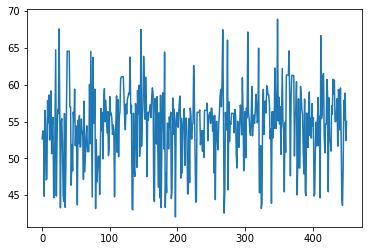

In [292]:
df..plot()

### Trying linear regression

In [270]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error as MAE

In [271]:
X_train.isna().any().any()

False

In [284]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_lr = reg.predict(X_test)
print(MAE(y_test, y_pred_lr))

0.023469259053048752


In [273]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print(MAE(y_test, y_pred_clf))
#clf.score(X_test, y_test)

0.4504337326069335


In [274]:
reg.score(X_test, y_test)

0.9879526098404657

### Random Forest 

In [275]:
from sklearn.ensemble import RandomForestRegressor

In [276]:
rf = RandomForestRegressor(max_depth=100, random_state=0, criterion="absolute_error", max_features="sqrt")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(MAE(y_test, y_pred_rf))

0.03629090726774908


In [320]:
rf = RandomForestRegressor(max_depth=100, random_state=0, criterion="absolute_error")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(MAE(y_test, y_pred_rf))

0.03319194033754107


In [282]:
rf = RandomForestRegressor(max_depth=200, random_state=2, criterion="absolute_error", oob_score=True)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(MAE(y_test, y_pred_rf))

0.03897790472595975


In [279]:
y_pred_rf

array([2.25618097, 4.71849887, 2.99434904, 1.17776461, 2.04347343,
       2.03989341, 1.18457809, 1.60943791, 3.21887582, 2.7080502 ,
       2.03989341, 2.39694217, 1.62146163, 2.25618097, 1.94591015,
       1.3776639 , 2.56638037, 2.39789527, 0.69314718, 1.35099162,
       2.69195582, 2.7080502 , 2.69488386, 1.60943791, 2.07959658,
       2.06270178, 1.09861229, 2.07944154, 2.7080502 , 1.09861229,
       2.547603  , 0.69314718, 2.7080502 , 1.09861229, 3.21887582,
       1.41283633, 2.04347343, 1.09861229, 4.71849887, 4.71849887,
       2.07944154, 2.7080502 , 2.07944154, 2.7080502 , 1.61126113,
       1.60274361])

In [280]:
np.array(list(y_test))

array([1.79175947, 4.71849887, 3.13549422, 1.09861229, 2.03989341,
       2.03989341, 1.09861229, 1.60943791, 3.21887582, 2.7080502 ,
       2.03989341, 2.39789527, 1.60943791, 2.77258872, 1.94591015,
       1.38629436, 2.56494936, 2.39789527, 0.69314718, 1.38629436,
       2.7080502 , 2.7080502 , 2.77258872, 1.60943791, 2.07944154,
       2.07944154, 1.09861229, 2.07944154, 2.7080502 , 1.09861229,
       2.56494936, 0.69314718, 2.7080502 , 1.09861229, 3.21887582,
       1.38629436, 2.03989341, 1.09861229, 4.71849887, 4.71849887,
       2.07944154, 2.7080502 , 2.07944154, 2.7080502 , 1.60943791,
       1.60943791])

In [321]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


In [329]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()



In [349]:
s = sorted_idx

Text(0.5, 0, 'Permutation Importance')

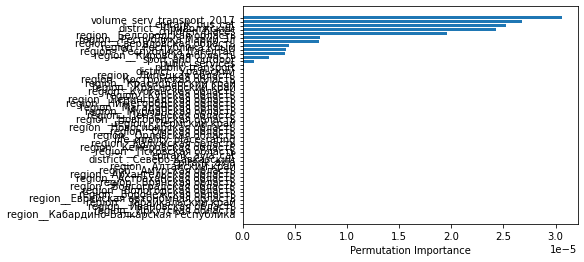

In [347]:
plt.barh(X_train.columns[s], perm_importance.importances_mean[s])
plt.xlabel("Permutation Importance")

In [357]:
for i in zip(X_train.columns[s],perm_importance.importances_mean[s]) :
    print(i[0], round(i[1], 5))

ecology -8e-05
lng -8e-05
epirank_train -6e-05
epirank_train_cat -5e-05
security -3e-05
shops_and_malls -2e-05
num_patients_tubercul_2012 -1e-05
district__Южный -1e-05
ivl_per_100k -0.0
life_costs -0.0
region__Оренбургская область -0.0
region__Республика Бурятия 0.0
region__Рязанская область 0.0
region__Ростовская область 0.0
region__Республика Чувашия 0.0
region__Республика Хакасия 0.0
region__Республика Тыва 0.0
region__Республика Татарстан 0.0
region__Республика Саха (Якутия) 0.0
region__Республика Мордовия 0.0
region__Самарская область 0.0
region__Республика Карелия 0.0
region__Республика Калмыкия 0.0
region__Республика Башкортостан 0.0
region__Республика Северная Осетия — Алания 0.0
region__Саратовская область 0.0
district__Дальневосточный 0.0
region__Смоленская область 0.0
cleanness 0.0
neighbourhood 0.0
has_metro 0.0
region__Ярославская область 0.0
region__Ямало-Ненецкий автономный округ 0.0
region__Чукотский автономный округ 0.0
region__Чеченская Республика 0.0
region__Челябинс

In [345]:
perm_importance.importances_mean[s]

array([-8.45501630e-05, -7.51332917e-05, -6.34804093e-05, -5.10582818e-05,
       -2.91665180e-05, -2.40073429e-05, -1.08951640e-05, -8.19530684e-06,
       -1.48907295e-06, -8.46885680e-07, -5.77706670e-07,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [361]:
for feature, importance in zip(X_train.columns[s],perm_importance.importances_mean[s]) :
    if not "district" in feature and not "region" in feature:
        
        Nan_percent = df[feature].isnull().sum()*100/451
    else:
        Nan_percent = 0
    print(feature, round(importance, 5), Nan_percent)

ecology -8e-05 75.16629711751663
lng -8e-05 0.0
epirank_train -6e-05 38.80266075388027
epirank_train_cat -5e-05 38.80266075388027
security -3e-05 75.16629711751663
shops_and_malls -2e-05 75.16629711751663
num_patients_tubercul_2012 -1e-05 9.977827050997783
district__Южный -1e-05 0
ivl_per_100k -0.0 21.951219512195124
life_costs -0.0 75.16629711751663
region__Оренбургская область -0.0 0
region__Республика Бурятия 0.0 0
region__Рязанская область 0.0 0
region__Ростовская область 0.0 0
region__Республика Чувашия 0.0 0
region__Республика Хакасия 0.0 0
region__Республика Тыва 0.0 0
region__Республика Татарстан 0.0 0
region__Республика Саха (Якутия) 0.0 0
region__Республика Мордовия 0.0 0
region__Самарская область 0.0 0
region__Республика Карелия 0.0 0
region__Республика Калмыкия 0.0 0
region__Республика Башкортостан 0.0 0
region__Республика Северная Осетия — Алания 0.0 0
region__Саратовская область 0.0 0
district__Дальневосточный 0.0 0
region__Смоленская область 0.0 0
cleanness 0.0 75.166297